## IMPORTING ALL THE NECESSARY PACKAGES

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint
import argparse

import json
import matplotlib.pyplot as plt
import seaborn as sns
import random, os
from PIL import Image

from working_model import build_model
from data_preprocessing import setup
from final_prediction import predict

## GETTING THE FREQUENCY OF EACH ANSWER IN THE DATASET

Text(0.5, 0, 'Frequency of answers')

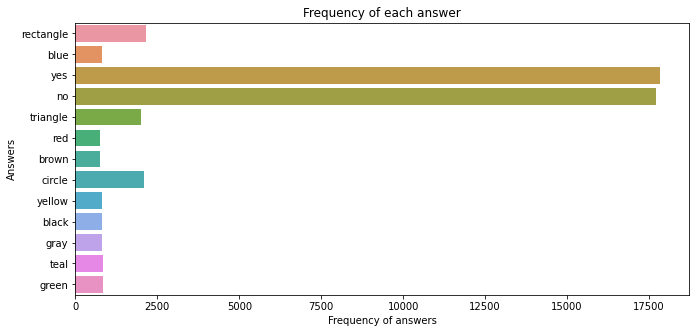

In [2]:
def read_questions(path):
      with open(path, 'r') as file:
        qs = json.load(file)
      ques = [q[0] for q in qs]
      ans = [q[1] for q in qs]
      image_ids = [q[2] for q in qs]
      return (ques, ans, image_ids)
    
train_qs, train_ans, train_image_ids = read_questions('data/train/questions.json')
valid_qs, valid_ans, valid_image_ids = read_questions('data/validation/questions.json')
test_qs, test_ans, test_image_ids = read_questions('data/test/questions.json')

ans_tot=train_ans+valid_ans+test_ans
plt.figure(figsize=(11,5))
plt.title("Frequency of each answer")
plt.ylabel("Answers")
sns.countplot(y=ans_tot)
plt.xlabel("Frequency of answers")

## MODEL TRAINING BEING DONE HERE

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--use-data-dir', action='store_true', help='Use custom data directory, at /data')
parser.add_argument('-f')
args = parser.parse_args()

if args.use_data_dir:
  print('Using data directory')

# fetching the processed data
train_X_ims, train_X_seqs, train_Y, test_X_ims, test_X_seqs, test_Y, im_shape, vocab_size, num_answers, _, _, _, valid_X_ims, valid_X_seqs, valid_Y = setup(args.use_data_dir)

print('\n--- Building model...')
model = build_model(im_shape, vocab_size, num_answers)
checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

print('\n--- Training model...')
Hist=model.fit(
  [train_X_ims, train_X_seqs],
  train_Y,
  validation_data=([valid_X_ims, valid_X_seqs], valid_Y),
  shuffle=True,
  epochs=15,
  callbacks=[checkpoint],
)


--- Reading questions...
Read 28833 training questions, 9742 validation questions and 9673 testing questions.

--- Reading answers...
Found 13 total answers:
['circle', 'green', 'red', 'gray', 'yes', 'teal', 'black', 'rectangle', 'yellow', 'triangle', 'brown', 'blue', 'no']

--- Reading/processing images...
Read 3000 training images, 1000 validation images and 1000 testing images.
Each image has shape (64, 64, 3).

--- Fitting question tokenizer...
Vocab Size: 27
{'is': 1, 'shape': 2, 'the': 3, 'a': 4, 'image': 5, 'there': 6, 'not': 7, 'what': 8, 'present': 9, 'does': 10, 'contain': 11, 'in': 12, 'color': 13, 'no': 14, 'rectangle': 15, 'circle': 16, 'triangle': 17, 'brown': 18, 'yellow': 19, 'gray': 20, 'teal': 21, 'green': 22, 'black': 23, 'blue': 24, 'red': 25, 'of': 26}

--- Converting questions to bags of words...
Example question bag of words: [0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0.]

--- Creating model input images...

--- Creating mode

c:\users\sawan aich\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


902/902 [==============================] - 20s 22ms/step - loss: 0.6660 - accuracy: 0.7071 - val_loss: 0.6650 - val_accuracy: 0.6990
Epoch 3/15
902/902 [==============================] - 20s 22ms/step - loss: 0.5870 - accuracy: 0.7322 - val_loss: 0.5554 - val_accuracy: 0.7342
Epoch 4/15
902/902 [==============================] - 20s 22ms/step - loss: 0.5093 - accuracy: 0.7571 - val_loss: 0.5050 - val_accuracy: 0.7529
Epoch 5/15
902/902 [==============================] - 20s 22ms/step - loss: 0.4436 - accuracy: 0.7725 - val_loss: 0.4552 - val_accuracy: 0.7619
Epoch 6/15
902/902 [==============================] - 20s 22ms/step - loss: 0.3892 - accuracy: 0.8029 - val_loss: 0.4058 - val_accuracy: 0.7993
Epoch 7/15
902/902 [==============================] - 20s 22ms/step - loss: 0.3464 - accuracy: 0.8392 - val_loss: 0.3815 - val_accuracy: 0.8176
Epoch 8/15
902/902 [==============================] - 20s 22ms/step - loss: 0.2990 - accuracy: 0.8592 - val_loss: 0.3618 - val_accuracy: 0.8284
Epo

## SHOWING PLOTS FOR LOSS AND ACCURACY

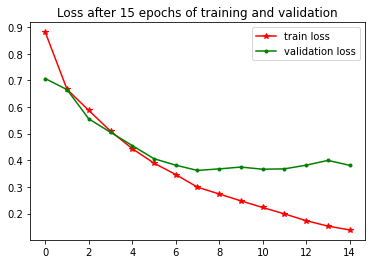

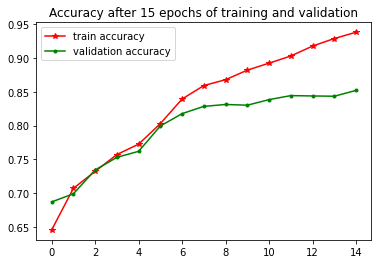

In [4]:
plt.plot(Hist.history['loss'],"r*-",label="train loss")
plt.plot(Hist.history['val_loss'],"g.-",label="validation loss")
plt.legend()
plt.title("Loss after 15 epochs of training and validation")
plt.show()
plt.plot(Hist.history['accuracy'],"r*-",label="train accuracy")
plt.plot(Hist.history['val_accuracy'],"g.-",label="validation accuracy")
plt.legend()
plt.title("Accuracy after 15 epochs of training and validation")
plt.show()

## TESTING ON A RANDOMLY GENERATED IMAGE FROM THE TEST SET

Text(0.5, 1.0, 'Test Image')

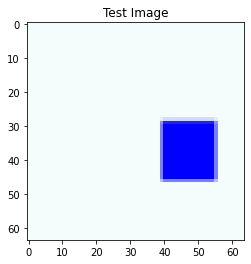

In [5]:
path = r'data/test/images'
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
im = Image.open(path+'/'+random_filename)
plt.imshow(im)
plt.title("Test Image")

## PREDICTING THE ANSWER HERE

If you want to ask a question from a pre-defined set of questions, enter 1
If you want to ask a question on your own, enter 2
Enter your value here : 1
Pre-defined questions related to this image are as follows :
                                  Questions
0               what shape is in the image?
1          does the image contain a circle?
2                   is no triangle present?
3                 is a black shape present?
4  is there not a green shape in the image?
5                is no brown shape present?
Enter a question index : 0
AxesSubplot(0.125,0.125;0.775x0.755)


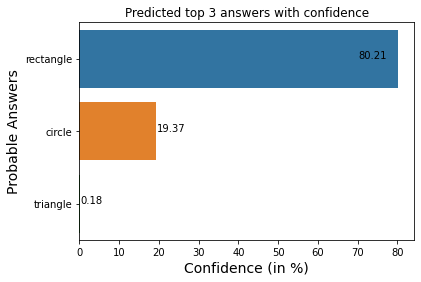

In [6]:
prediction=predict(random_filename,model)
# print("Predicted top 3 answers with confidence : ")
print(prediction)